https://huggingface.co/spaces/moacirb/dogs_cats

In [1]:
from fastai.vision.all import *
import gradio as gr

In [2]:
path = untar_data(URLs.PETS)/'images'

In [3]:
def is_cat(x): return x[0].isupper()

In [4]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func = is_cat,
    item_tfms=Resize(192))

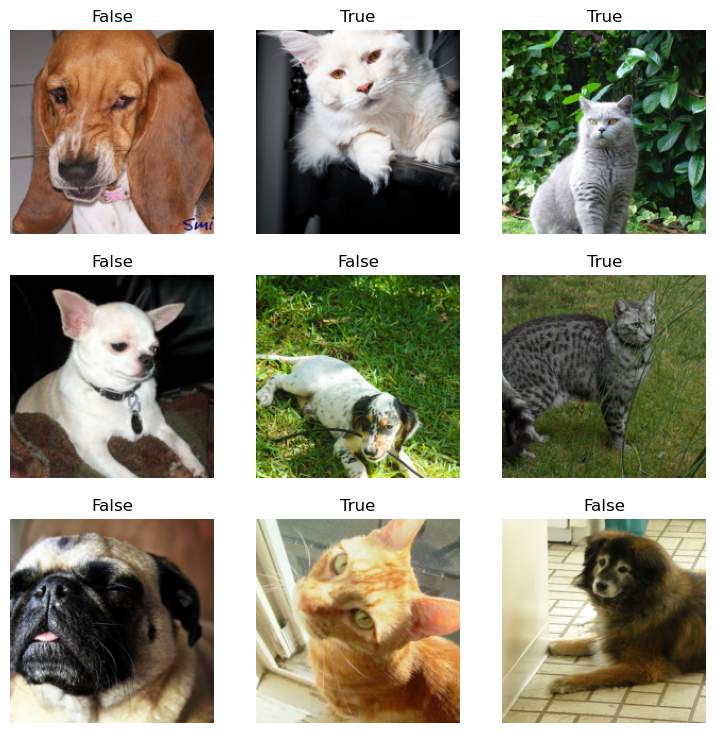

In [5]:
dls.show_batch()

## Treinando e exportando o modelo

In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/home/moacir/anaconda3/envs/lia3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/moacir/anaconda3/envs/lia3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
learn.export('model.pkl')

## Carregando o modelo

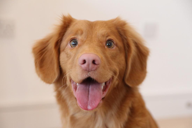

In [8]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [9]:
learn = load_learner('model.pkl')

In [10]:
%time 
learn.predict(im)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


('False', tensor(0), tensor([9.9999e-01, 5.8810e-06]))

In [11]:
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [12]:
classify_image(im)

{'Dog': 0.999994158744812, 'Cat': 5.8809910115087405e-06}

In [13]:
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'scooby.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/home/moacir/anaconda3/envs/lia3/lib/python3.10/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/moacir/anaconda3/envs/lia3/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/moacir/anaconda3/envs/lia3/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/moacir/anaconda3/envs/lia3/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
